In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from crypto_chatter.graph import *

import networkx as nx

data_source = 'twitter'
index_name = 'blockchain-interoperability-attacks'

In [3]:
graph = CryptoTwitterUserGraph(index_name)

loaded graph edges in 1 seconds
loaded cached graph data in 119 seconds
constructed complete user graph in 128 seconds


In [4]:
G = graph.G

In [5]:
df = graph.data

In [6]:
len(df)

16625047

In [7]:
len(G.nodes)

1640251

In [8]:
len(G.edges)

2520608

In [9]:
df.head()

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
0,Fri Nov 11 12:03:53 +0000 2022,NaN,0,"@0x5ab0 @Uniswap oh, missed fiat part, just sa...",NaN,NaN,NaN,1591039006850310148,0,NaN,...,False,NaN,Mon Jul 11 06:36:43 +0000 2011,7050,5554,True,333239871,"CARBONdale, CO",NaN,NaN
1,Fri Nov 11 12:03:53 +0000 2022,Never seen such a deal for a punk since 2017! ...,0,Never seen such a deal for a punk since 2017! ...,NaN,NaN,NaN,1591039006770622468,0,Fri Nov 11 11:00:59 +0000 2022,...,True,NaN,Wed Nov 09 14:09:46 +0000 2022,0,2,False,1590345908172083201,Netherlands,NaN,NaN
2,Fri Nov 11 12:03:53 +0000 2022,Collection: ens \n Sold for: 1.0040189 Eth (12...,0,Collection: ens \n Sold for: 1.0040189 Eth (12...,NaN,NaN,NaN,1591039006501994503,0,NaN,...,True,NaN,Sun May 01 15:06:34 +0000 2022,106,2,False,1520781667769614337,blockchain,NaN,NaN
3,Fri Nov 11 12:03:54 +0000 2022,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,0,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,NaN,NaN,NaN,1591039007357550592,0,NaN,...,True,NaN,Wed Dec 18 21:46:55 +0000 2013,0,0,False,2252580014,None,NaN,NaN
4,Fri Nov 11 12:03:54 +0000 2022,@abu_crypto1 🩸 Scary bunny is a meme token wit...,0,@abu_crypto1 🩸 Scary bunny is a meme token wit...,NaN,NaN,NaN,1591039007764668417,0,NaN,...,True,NaN,Tue Oct 25 03:46:04 +0000 2022,3,50,False,1584753080113025025,None,NaN,NaN


In [10]:
degrees = dict(G.degree())
degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
degrees = [degree for _, degree in degrees]

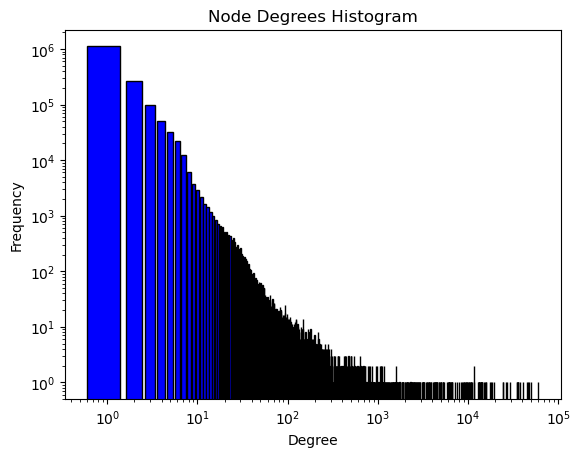

In [11]:
unique_degrees, degree_frequencies = np.unique(degrees, return_counts=True)
plt.bar(unique_degrees, degree_frequencies, color='blue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title('Node Degrees Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [12]:
all_scc = list(nx.strongly_connected_components(G))
all_scc = sorted(all_scc, key=len, reverse=True)

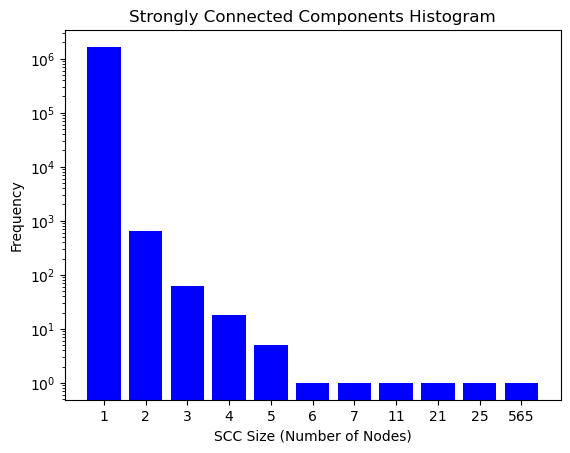

In [13]:
scc_sizes = [len(scc) for scc in all_scc]
scc_sizes, scc_frequencies = np.unique(scc_sizes, return_counts=True)


# Plot the histogram with x-axis treated as categorical
plt.bar(range(len(scc_sizes)), scc_frequencies, color='blue')
plt.xticks(range(len(scc_sizes)), scc_sizes)
plt.yscale('log')
plt.title('Strongly Connected Components Histogram')
plt.xlabel('SCC Size (Number of Nodes)')
plt.ylabel('Frequency')
plt.show()

In [14]:
def visualize_scc(G, scc, show_labels = False):
    
    subgraph = G.subgraph(scc)

    pos = nx.kamada_kawai_layout(subgraph)
        
    nx.draw(
            subgraph,
            pos,
            node_color='skyblue',
            node_size=100,
            font_size=6,
            font_color='black',
            font_weight='bold',
            edge_color='gray',
            linewidths=1,
            alpha=0.7
        )
     
    if show_labels:
            
        label_pos = {k: (x, y - 0.12) for k, (x, y) in pos.items()}
        nx.draw_networkx_labels(subgraph, label_pos, font_size=6, font_color='black', font_weight='bold')

    
    plt.title('Connected Component Visualization')
    plt.show()

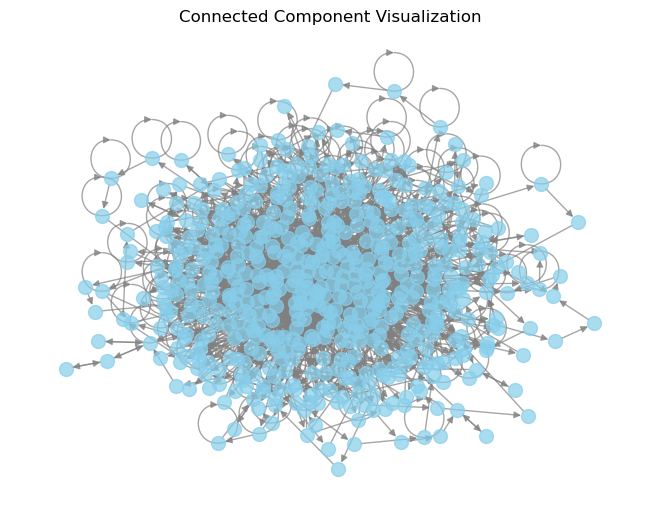

In [15]:
visualize_scc(G, all_scc[0])

In [16]:
all_scc[0]

{3840,
 43763,
 798536,
 896141,
 2030711,
 2200781,
 2723411,
 3586271,
 4004901,
 4107711,
 5022271,
 5404442,
 5686612,
 5763262,
 5867132,
 6450372,
 7184612,
 7864222,
 8467082,
 8632762,
 9026112,
 9078472,
 9571702,
 9717472,
 10446482,
 11336782,
 11471572,
 11582012,
 12071362,
 12263542,
 14095650,
 14096763,
 14101605,
 14123881,
 14182218,
 14196108,
 14285961,
 14334846,
 14379660,
 14562285,
 14592709,
 14654085,
 14723614,
 14814762,
 14855994,
 14931637,
 14935367,
 15043917,
 15226458,
 15250501,
 15281391,
 15446531,
 15567173,
 15672273,
 15809138,
 15863880,
 15950086,
 15985111,
 16076032,
 16106584,
 16598957,
 16783996,
 16861509,
 17250666,
 17351167,
 17702451,
 17881764,
 17888010,
 17925409,
 18189286,
 18213426,
 18266688,
 18269124,
 18300968,
 18359716,
 18378349,
 18555793,
 18686907,
 18719020,
 18839937,
 18856867,
 18946913,
 19062153,
 19079480,
 19224439,
 19546277,
 19721574,
 19748227,
 19951102,
 20169416,
 20178419,
 20374262,
 20648704,
 2065660

In [17]:
df[df['user.id'] == 3586271]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
94687,Fri Nov 11 12:40:14 +0000 2022,You may think that all centralized exchanges a...,0,You may think that all centralized exchanges a...,NaN,NaN,NaN,1591048152110755842,0,NaN,...,True,NaN,Fri Apr 06 03:57:54 +0000 2007,26532,2695,True,3586271,"Virginia, USA",NaN,NaN
80438,Thu Nov 10 01:04:37 +0000 2022,The thing that bothers me most about these col...,7,The thing that bothers me most about these col...,NaN,NaN,NaN,1590510705132068864,0,NaN,...,True,NaN,Fri Apr 06 03:57:54 +0000 2007,26538,2695,True,3586271,"Virginia, USA",NaN,NaN
40835,Wed Nov 09 23:33:25 +0000 2022,NaN,0,In a way @cobie he was trying to bankrupt thes...,NaN,NaN,NaN,1590487755586678785,0,Sat Nov 05 18:43:11 +0000 2022,...,False,NaN,Fri Apr 06 03:57:54 +0000 2007,26509,2692,True,3586271,"Virginia, USA",NaN,NaN
82149,Fri Nov 11 18:33:50 +0000 2022,NaN,0,so long as i don't have to have a laborious bl...,NaN,NaN,NaN,1591137138678063104,0,Fri Nov 11 16:37:43 +0000 2022,...,False,NaN,Fri Apr 06 03:57:54 +0000 2007,26533,2697,True,3586271,"Virginia, USA",NaN,NaN
3002,Mon Nov 14 14:36:49 +0000 2022,It took a few bean bag chairs and billions of ...,0,It took a few bean bag chairs and billions of ...,NaN,NaN,NaN,1592164656743075841,0,NaN,...,True,NaN,Fri Apr 06 03:57:54 +0000 2007,26512,2699,True,3586271,"Virginia, USA",NaN,NaN
97596,Sat Nov 12 01:39:12 +0000 2022,I have deep respect for principled people in c...,0,I have deep respect for principled people in c...,NaN,NaN,NaN,1591244186186969088,0,NaN,...,True,NaN,Fri Apr 06 03:57:54 +0000 2007,26534,2696,True,3586271,"Virginia, USA",NaN,NaN
66536,Mon Nov 14 02:13:31 +0000 2022,NaN,0,Somehow we’ve managed to allow Bitboy to escap...,NaN,NaN,NaN,1591977599592730624,0,NaN,...,False,NaN,Fri Apr 06 03:57:54 +0000 2007,26514,2699,True,3586271,"Virginia, USA",NaN,NaN
61355,Sat Nov 12 14:00:07 +0000 2022,Stop this bullshit about custody of funds bein...,0,Stop this bullshit about custody of funds bein...,NaN,NaN,NaN,1591430643501903872,0,NaN,...,True,NaN,Fri Apr 06 03:57:54 +0000 2007,26532,2697,True,3586271,"Virginia, USA",NaN,NaN
86170,Sat Nov 12 02:59:31 +0000 2022,One of the big reasons our business wasn’t abl...,13,One of the big reasons our business wasn’t abl...,NaN,NaN,NaN,1591264400488689664,0,NaN,...,True,NaN,Fri Apr 06 03:57:54 +0000 2007,26524,2699,True,3586271,"Virginia, USA",NaN,NaN
22525,Sun Nov 13 20:59:30 +0000 2022,Only way to take your mind off one of the shit...,0,Only way to take your mind off one of the shit...,NaN,NaN,NaN,1591898571208790016,0,NaN,...,True,NaN,Fri Apr 06 03:57:54 +0000 2007,26519,2699,True,3586271,"Virginia, USA",NaN,NaN


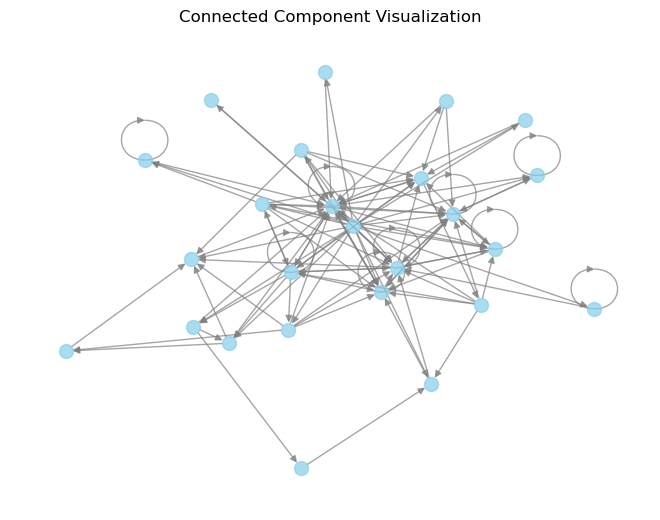

In [18]:
visualize_scc(G, all_scc[1])

In [19]:
all_scc[1]

{825202871427751936,
 912957684852318208,
 1510467423362637824,
 1517168776977915904,
 1517170926651166720,
 1518663117966049280,
 1518981680060461056,
 1518983855730212864,
 1518993327513047040,
 1519152370491437056,
 1520268892345577472,
 1520269534434758656,
 1520812629660372992,
 1521694472479952896,
 1522011986514440192,
 1522506688842010624,
 1522822906023088128,
 1526593404473249792,
 1548336466639884288,
 1548680749213106176,
 1549619001365790720,
 1563756343370035200,
 1563814773254660096,
 1566883966656819200,
 1574611704805150720}

In [20]:
df[df['user.id'] == 1518981680060461056]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
80421,Wed Nov 09 04:27:18 +0000 2022,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,8,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,NaN,NaN,NaN,1590199325690572802,0,NaN,...,True,NaN,Tue Apr 26 15:54:19 +0000 2022,892,603,True,1518981680060461056,None,None,None
62089,Tue Nov 08 08:18:30 +0000 2022,@VIKASTR64858110 @therahulads @BrijSharma1980 ...,5,@VIKASTR64858110 @therahulads @BrijSharma1980 ...,NaN,NaN,NaN,1589895119779815428,0,NaN,...,True,NaN,Tue Apr 26 15:54:19 +0000 2022,886,603,True,1518981680060461056,None,None,None
11943,Wed Nov 09 00:49:08 +0000 2022,@RunadVNZLX @djtakefive @PrinceDionysos @Black...,12,@RunadVNZLX @djtakefive @PrinceDionysos @Black...,NaN,NaN,NaN,1590144423526293504,0,NaN,...,True,NaN,Tue Apr 26 15:54:19 +0000 2022,887,603,True,1518981680060461056,None,None,None
93360,Wed Nov 09 04:35:34 +0000 2022,@VIKASTR64858110 @therahulads @BrijSharma1980 ...,3,@VIKASTR64858110 @therahulads @BrijSharma1980 ...,NaN,NaN,NaN,1590201406321221632,0,NaN,...,True,NaN,Tue Apr 26 15:54:19 +0000 2022,887,603,True,1518981680060461056,None,None,None
62176,Wed Nov 09 04:29:40 +0000 2022,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,12,@BrijSharma1980 @therahulads @CryptoAdsIndia @...,NaN,NaN,NaN,1590199921294344193,0,NaN,...,True,NaN,Tue Apr 26 15:54:19 +0000 2022,888,603,True,1518981680060461056,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40593,Mon Nov 21 00:58:38 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,83,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1594495466468970496,2,NaN,...,True,NaN,Tue Apr 26 15:54:19 +0000 2022,918,666,True,1518981680060461056,None,None,None
86397,Wed Nov 23 01:46:52 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,19,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1595232382692773889,3,Tue Nov 22 00:57:12 +0000 2022,...,True,NaN,Tue Apr 26 15:54:19 +0000 2022,918,666,True,1518981680060461056,None,None,None
94849,Wed Nov 23 15:19:37 +0000 2022,@Yogeshmistari59 @therahulads @CryptoAdsIndia ...,5,@Yogeshmistari59 @therahulads @CryptoAdsIndia ...,NaN,NaN,NaN,1595436918531330049,0,NaN,...,True,NaN,Tue Apr 26 15:54:19 +0000 2022,918,666,True,1518981680060461056,None,None,None
2649,Tue Nov 22 05:33:26 +0000 2022,#ADSCOIN is the Future of #Crypto World. Comin...,75,#ADSCOIN is the Future of #Crypto World. Comin...,NaN,NaN,NaN,1594927013156257794,2,NaN,...,True,NaN,Tue Apr 26 15:54:19 +0000 2022,918,666,True,1518981680060461056,None,None,None


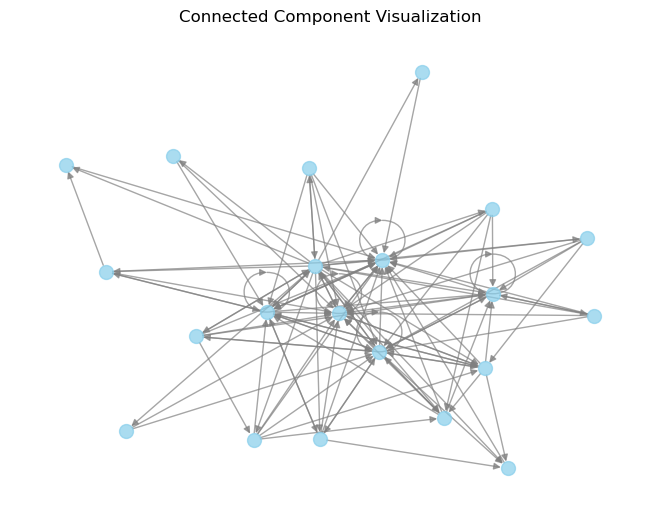

In [21]:
visualize_scc(G, all_scc[2])

In [22]:
all_scc[2]

{132146668,
 302686882,
 407861358,
 1373794038,
 2366663978,
 2539284575,
 2884498638,
 3196973563,
 3247613569,
 3346348648,
 4921730335,
 706347814960259072,
 876757408038572032,
 950621345544482816,
 1236599199103201280,
 1536572639321661440,
 1568207259628638208,
 1578441484923199488,
 1582049279023415296,
 1588568332160012288,
 1592585215859650560}

In [23]:
df[df['user.id'] == 950621345544482816]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
807,Sun Nov 20 16:12:37 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,3,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1594363093487755264,2,Sun Nov 20 09:29:29 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,70,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
33878,Sun Nov 20 16:10:06 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,0,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1594362459166371840,0,Sat Nov 19 14:11:20 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,70,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
45047,Sun Nov 20 17:24:42 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,0,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1594381230992404481,0,Sat Nov 19 05:32:30 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,70,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
57334,Sun Nov 20 16:11:08 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,3,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1594362720010526721,2,Sun Nov 20 03:40:33 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,70,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
66984,Sun Nov 20 06:01:59 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,3,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1594209420845932554,4,Sun Nov 20 02:50:32 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,70,184,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92791,Wed Nov 23 13:07:28 +0000 2022,@BJP4JnK @ImRavinderRaina #SaveKashmiriHindus ...,2,@BJP4JnK @ImRavinderRaina #SaveKashmiriHindus ...,NaN,NaN,NaN,1595403661433139200,1,NaN,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,69,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
52196,Wed Nov 23 13:07:20 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,1,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1595403627937599488,0,Wed Nov 23 12:04:59 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,69,185,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
20911,Wed Nov 23 14:39:24 +0000 2022,"@ImRavinderRaina ji ap aage bhado, hum pm pack...",0,"@ImRavinderRaina ji ap aage bhado, hum pm pack...",NaN,NaN,NaN,1595426794366455809,0,Tue Nov 22 15:32:47 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,69,184,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN
25579,Tue Nov 22 18:02:29 +0000 2022,#SaveKashmiriHindus PM Package Employee’s \nTi...,8,#SaveKashmiriHindus PM Package Employee’s \nTi...,NaN,NaN,NaN,1595115515433082882,2,Tue Nov 22 15:27:06 +0000 2022,...,True,NaN,Tue Jan 09 06:52:45 +0000 2018,69,183,False,950621345544482816,"Jammu & Kashmir, India",NaN,NaN


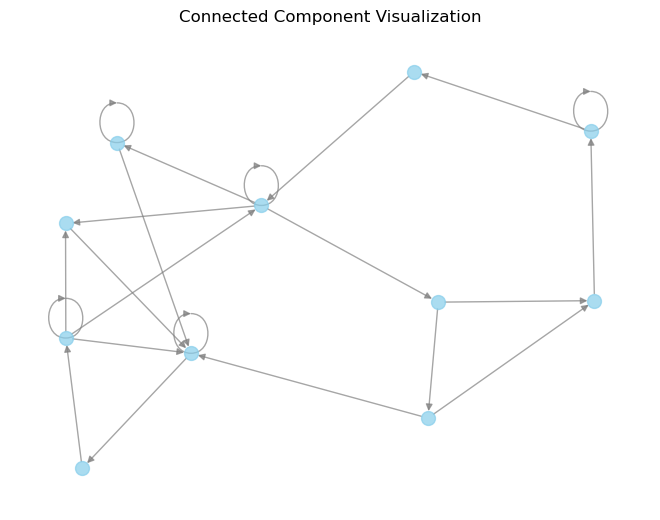

In [24]:
visualize_scc(G, all_scc[3])

In [25]:
all_scc[3]

{5533262,
 6068692,
 7910872,
 25570572,
 85636440,
 372650546,
 931179333607215104,
 1051710088098996224,
 1117689210566316032,
 1314846469128585216,
 1471733556989018112}

In [26]:
df[df['user.id'] == 5533262]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
46262,Fri Nov 11 11:22:11 +0000 2022,"@TravellerNow @sedane94 @binance can, but woul...",0,"@TravellerNow @sedane94 @binance can, but woul...",NaN,NaN,NaN,1591028509195251712,0,NaN,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,11697,5479,True,5533262,"Hanoi, Vietnam",NaN,NaN
49540,Fri Nov 11 07:55:40 +0000 2022,NaN,6,Noticing good stuff from cosmos news.,NaN,NaN,NaN,1590976539151433728,0,Thu Nov 10 20:08:07 +0000 2022,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,11697,5479,True,5533262,"Hanoi, Vietnam",NaN,NaN
64434,Fri Nov 11 06:39:55 +0000 2022,NaN,0,Install the electric fence around cosmos and I...,NaN,NaN,NaN,1590957477574905857,0,NaN,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,11701,5479,True,5533262,"Hanoi, Vietnam",NaN,NaN
28478,Wed Nov 09 21:24:51 +0000 2022,@danhwang88 Improve cosmos by distributing inf...,0,@danhwang88 Improve cosmos by distributing inf...,NaN,NaN,NaN,1590455400306192385,0,Wed Nov 09 19:25:14 +0000 2022,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,11699,5461,True,5533262,"Hanoi, Vietnam",NaN,NaN
92692,Wed Nov 09 19:29:23 +0000 2022,NaN,0,this was posted in the cosmos hub public chat....,NaN,NaN,NaN,1590426342696574977,0,NaN,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,11701,5461,True,5533262,"Hanoi, Vietnam",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32471,Tue Nov 22 08:30:53 +0000 2022,This is incredibly good information on decentr...,0,This is incredibly good information on decentr...,NaN,NaN,NaN,1594971667167850498,0,Tue Nov 22 06:04:14 +0000 2022,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,12063,5515,True,5533262,"Hanoi, Vietnam",NaN,NaN
17273,Tue Nov 22 05:06:53 +0000 2022,our team missed an osmosis upgrade.\n\nas a va...,0,our team missed an osmosis upgrade.\n\nas a va...,NaN,NaN,NaN,1594920329285365763,0,NaN,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,12059,5514,True,5533262,"Hanoi, Vietnam",NaN,NaN
39397,Wed Nov 23 12:22:59 +0000 2022,NaN,5,The Cosmos Hub community is unique in that you...,NaN,NaN,NaN,1595392466139897862,0,NaN,...,False,NaN,Thu Apr 26 17:04:58 +0000 2007,12024,5519,True,5533262,"Hanoi, Vietnam",NaN,NaN
65515,Wed Nov 23 14:03:12 +0000 2022,I think more validators should be working on t...,2,I think more validators should be working on t...,NaN,NaN,NaN,1595417684425920512,0,NaN,...,True,NaN,Thu Apr 26 17:04:58 +0000 2007,12048,5519,True,5533262,"Hanoi, Vietnam",NaN,NaN


In [27]:
all_scc[4]

{1153658704782397440,
 1413674305636950016,
 1480208511342571520,
 1565046338915815424,
 1585791768808681472,
 1588364611191029760,
 1589535471792574464}

In [28]:
df[df['user.id'] == 1589535471792574464]

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
49115,Sat Nov 12 09:20:26 +0000 2022,NaN,0,"""Not just any, ""dog"" a... \n\nDrum roll please...",NaN,NaN,NaN,1591360258043424769,0,Sat Nov 12 09:18:42 +0000 2022,...,False,NaN,Mon Nov 07 08:29:38 +0000 2022,118,201,False,1589535471792574464,Night City,NaN,NaN
55709,Sat Nov 12 09:32:30 +0000 2022,NaN,0,combat settings installed. But once it does an...,NaN,NaN,NaN,1591363297068322816,0,NaN,...,False,NaN,Mon Nov 07 08:29:38 +0000 2022,118,201,False,1589535471792574464,Night City,NaN,NaN
78336,Sat Nov 12 01:11:39 +0000 2022,NaN,0,I think I'm a pretty bad guy myself but even I...,NaN,NaN,NaN,1591237254441472000,0,Sat Nov 12 01:10:36 +0000 2022,...,False,NaN,Mon Nov 07 08:29:38 +0000 2022,116,196,False,1589535471792574464,Night City,NaN,NaN
17611,Thu Nov 17 06:46:51 +0000 2022,"""I've got a lot of names, actually. But hey, t...",0,"""I've got a lot of names, actually. But hey, t...",NaN,NaN,NaN,1593133548982407168,0,Thu Nov 17 06:27:51 +0000 2022,...,True,NaN,Mon Nov 07 08:29:38 +0000 2022,149,236,False,1589535471792574464,Night City,NaN,NaN


In [29]:
df.head()

,created_at,extended_tweet.full_text,favorite_count,full_text,geo,geo.coordinates,geo.type,id,quote_count,quoted_status.created_at,...,truncated,truncatedquoted_status.truncated,user.created_at,user.followers_count,user.friends_count,user.geo_enabled,user.id,user.location,quoted_status.geo.coordinates,quoted_status.geo.type
0,Fri Nov 11 12:03:53 +0000 2022,NaN,0,"@0x5ab0 @Uniswap oh, missed fiat part, just sa...",NaN,NaN,NaN,1591039006850310148,0,NaN,...,False,NaN,Mon Jul 11 06:36:43 +0000 2011,7050,5554,True,333239871,"CARBONdale, CO",NaN,NaN
1,Fri Nov 11 12:03:53 +0000 2022,Never seen such a deal for a punk since 2017! ...,0,Never seen such a deal for a punk since 2017! ...,NaN,NaN,NaN,1591039006770622468,0,Fri Nov 11 11:00:59 +0000 2022,...,True,NaN,Wed Nov 09 14:09:46 +0000 2022,0,2,False,1590345908172083201,Netherlands,NaN,NaN
2,Fri Nov 11 12:03:53 +0000 2022,Collection: ens \n Sold for: 1.0040189 Eth (12...,0,Collection: ens \n Sold for: 1.0040189 Eth (12...,NaN,NaN,NaN,1591039006501994503,0,NaN,...,True,NaN,Sun May 01 15:06:34 +0000 2022,106,2,False,1520781667769614337,blockchain,NaN,NaN
3,Fri Nov 11 12:03:54 +0000 2022,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,0,@Rocket_Moonshot @NzXrp @Bitboy_Crypto @digita...,NaN,NaN,NaN,1591039007357550592,0,NaN,...,True,NaN,Wed Dec 18 21:46:55 +0000 2013,0,0,False,2252580014,None,NaN,NaN
4,Fri Nov 11 12:03:54 +0000 2022,@abu_crypto1 🩸 Scary bunny is a meme token wit...,0,@abu_crypto1 🩸 Scary bunny is a meme token wit...,NaN,NaN,NaN,1591039007764668417,0,NaN,...,True,NaN,Tue Oct 25 03:46:04 +0000 2022,3,50,False,1584753080113025025,None,NaN,NaN


In [30]:
df.columns

Index(['created_at', 'extended_tweet.full_text', 'favorite_count', 'full_text',
       'geo', 'geo.coordinates', 'geo.type', 'id', 'quote_count',
       'quoted_status.created_at', 'quoted_status.extended_tweet.full_text',
       'quoted_status.favorite_count', 'quoted_status.full_text',
       'quoted_status.geo', 'quoted_status.id', 'quoted_status.quote_count',
       'quoted_status.reply_count', 'quoted_status.retweet_count',
       'quoted_status.text', 'quoted_status.truncated',
       'quoted_status.user.created_at', 'quoted_status.user.followers_count',
       'quoted_status.user.friends_count', 'quoted_status.user.geo_enabled',
       'quoted_status.user.id', 'quoted_status.user.location', 'reply_count',
       'retweet_count', 'text', 'truncated',
       'truncatedquoted_status.truncated', 'user.created_at',
       'user.followers_count', 'user.friends_count', 'user.geo_enabled',
       'user.id', 'user.location', 'quoted_status.geo.coordinates',
       'quoted_status.geo.type

In [31]:
curr_scc = all_scc[0]

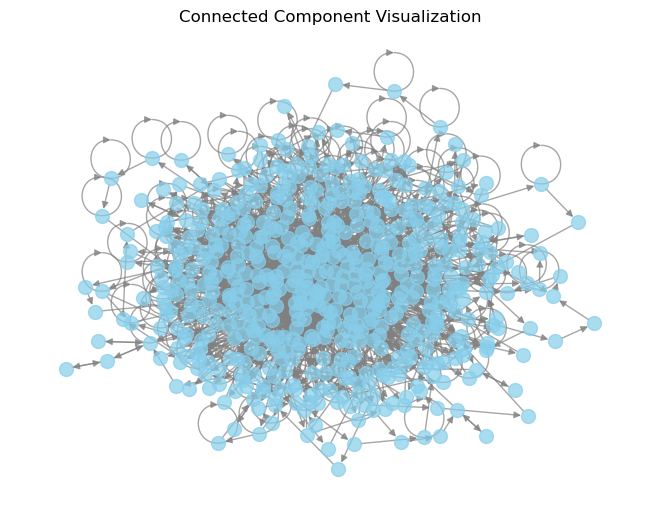

In [32]:
subgraph = G.subgraph(curr_scc)
pos = nx.kamada_kawai_layout(subgraph)
        
nx.draw(
        subgraph,
        pos,
        node_color='skyblue',
        node_size=100,
        font_size=6,
        font_color='black',
        font_weight='bold',
        edge_color='gray',
        linewidths=1,
        alpha=0.7
    )
 
        
# label_pos = {k: (x, y - 0.12) for k, (x, y) in pos.items()}
# nx.draw_networkx_labels(subgraph, label_pos, font_size=6, font_color='black', font_weight='bold')


plt.title('Connected Component Visualization')
plt.show()

In [33]:
start_node = list(curr_scc)[2]

reachable_nodes = nx.single_source_shortest_path_length(G, start_node)
non_scc_reachable_nodes = {node: distance for node, distance in reachable_nodes.items() if node not in curr_scc}
sorted_reachable_nodes = sorted(non_scc_reachable_nodes.items(), key=lambda x: x[1], reverse=True)

print(len(sorted_reachable_nodes)),
print(sorted_reachable_nodes[0:10])

60245
[(1525370781743558656, 13), (1525382365434253312, 13), (1553801954874331139, 13), (1522919316953260032, 13), (1583869360392773633, 13), (1489896283116503047, 13), (1030459668, 13), (1586175440905211905, 13), (1585103627173056512, 13), (1507962802979618825, 13)]


In [50]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from wordcloud import WordCloud
from sklearn.cluster import KMeans


def clean_text(text):
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(['amp', 'rt', 'via', '...', '...', '’', '—', '“', '”', '‘', '’', '...', '``', "''", '️', '...'])
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[@#]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words and word not in custom_stopwords]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

def get_tfidf(df, scc):
    nltk.download('stopwords')
    
    user_ids_in_scc = [node for node in scc]
    full_texts_in_scc = list(df[df['user.id'].isin(user_ids_in_scc)]['full_text'])
    cleaned_texts = [clean_text(text) for text in full_texts_in_scc]
    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(cleaned_texts)
    feature_names = vectorizer.get_feature_names_out()

    return tfidf_matrix, feature_names


def get_top_k_words_from_scc(df, scc, k=50, barplot=False, wordcloud=True):

    tfidf_matrix, feature_names = get_tfidf(df, scc)
    term_sum = tfidf_matrix.sum(axis=0)
    term_df = pd.DataFrame({'term': feature_names, 'tfidf_sum': term_sum.tolist()[0]})
    term_df_sorted = term_df.sort_values(by='tfidf_sum', ascending=False)
    top_keywords = term_df_sorted.head(k)['term'].tolist()

    if(barplot):
        plt.figure(figsize=(12, 6))
        plt.bar(top_keywords, term_df_sorted.head(k)['tfidf_sum'], color='skyblue')
        plt.xticks(rotation=90, ha='right')
        plt.xlabel('Keywords')
        plt.ylabel('TF-IDF Sum')
        plt.title('Top' + str(k) + ' Keywords by TF-IDF Sum')
        plt.tight_layout()
        plt.show()
    
    if(wordcloud):
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_df_sorted.set_index('term')['tfidf_sum'][0:k].to_dict())
    
        plt.figure(figsize=(10, 5))
        plt.title('Top' + str(k) + ' Keywords by TF-IDF Sum')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    
    return top_keywords


def cluster_documents(df, scc, num_clusters=5):
    tfidf_matrix, _ = get_tfidf(df, scc)
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)

    return clusters

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mridul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


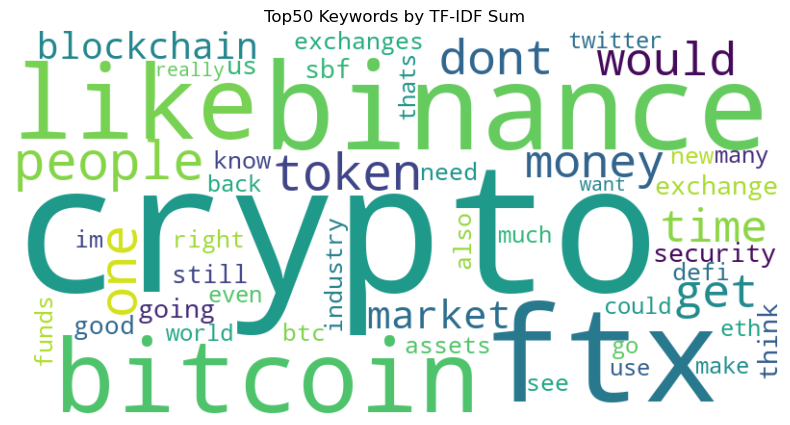

In [51]:
top_keywpords = get_top_k_words_from_scc(df, all_scc[0], k=50, barplot=False, wordcloud=True)

nan

In [74]:
original_tweet_length = df['full_text'].apply(lambda x: len(x) if pd.notna(x) else np.nan)
quoted_tweet_length = df['quoted_status.full_text'].apply(lambda x: len(x) if pd.notna(x) else np.nan)

avg_original_length = original_tweet_length.mean(skipna=True)
avg_quoted_length = quoted_tweet_length.mean(skipna=True)



# Compare engagement metrics between original and quoted tweets
original_engagement = df[['favorite_count', 'retweet_count']].loc[df['quoted_status.id'].isnull()]
quoted_engagement = df[['quoted_status.favorite_count', 'quoted_status.retweet_count']].dropna()

avg_original_favorite = original_engagement['favorite_count'].mean()
avg_original_retweet = original_engagement['retweet_count'].mean()
avg_quoted_favorite = quoted_engagement['quoted_status.favorite_count'].mean()
avg_quoted_retweet = quoted_engagement['quoted_status.retweet_count'].mean()

print(f"Average length of Original Tweets: {avg_quoted_length:.2f}")
print(f"Average length of Quotes: {avg_original_length:.2f}")
print("")
print(f"Average favorites for original tweets: {avg_quoted_favorite:.2f}")
print(f"Average favorites for quotes: {avg_original_favorite:.2f}")
print("")
print(f"Average retweets for original tweets: {avg_quoted_retweet:.2f}")
print(f"Average retweets for quotes: {avg_original_retweet:.2f}")


Average length of Original Tweets: 236.93
Average length of Quotes: 181.05

Average favorites for original tweets: 2145.37
Average favorites for quotes: 4.89

Average retweets for original tweets: 502.87
Average retweets for quotes: 1.48


In [102]:
df_network = df[['created_at', 'user.id', 'quoted_status.user.id']].copy()
df_network['created_at'] = pd.to_datetime(df_network['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
df_network.sort_values(by='created_at', inplace=True)

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_1960/241557130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


In [226]:
def plot_scc_time_series(selected_scc):

    df_network_scc = df_network[df_network['user.id'].isin(selected_scc) | df_network['quoted_status.user.id'].isin(selected_scc)]
    df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
    
    relevant_timestamps = df_network_scc[df_network_scc['user.id'].isin(selected_scc)]['created_at'].unique()
    
    scc_sizes = []
    scc_densities = []
    
    for timestamp in relevant_timestamps:
        
        relevant_edges = df_network_scc[(df_network_scc['created_at'] <= timestamp) & (df_network_scc['user.id'].isin(selected_scc))]
        subgraph = G.edge_subgraph(zip(relevant_edges['user.id'], relevant_edges['quoted_status.user.id']))
        
        scc_sizes.append(len(subgraph))
        scc_densities.append(nx.density(subgraph))
    
    min_length = len(scc_sizes)
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    color = 'tab:red'
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Size of SCC', color=color)
    ax1.plot(relevant_timestamps[4:min_length], scc_sizes[4:min_length], label='Size of SCC', marker='o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:blue'
    ax2.set_ylabel('Density of SCC', color=color)  # we already handled the x-label with ax1
    ax2.plot(relevant_timestamps[4:min_length], scc_densities[4:min_length], label='Density of SCC', marker='o', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    
    fig.tight_layout()  # ensure all labels and plots fit nicely
    plt.title('SCC Metrics Over Time')
    plt.show()

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_1960/4276516248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


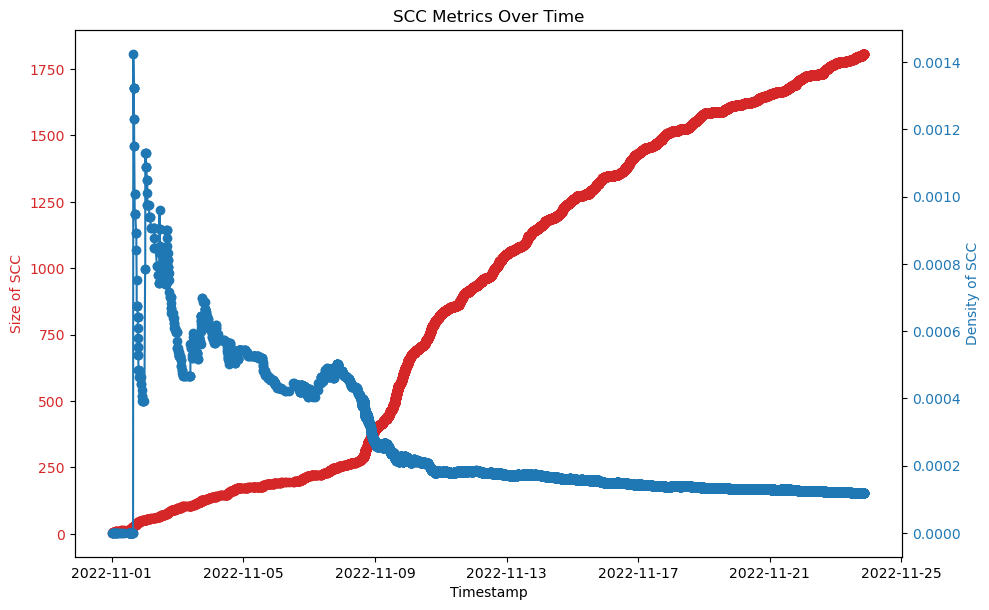

In [232]:
plot_scc_time_series(all_scc[0])

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_1960/4276516248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


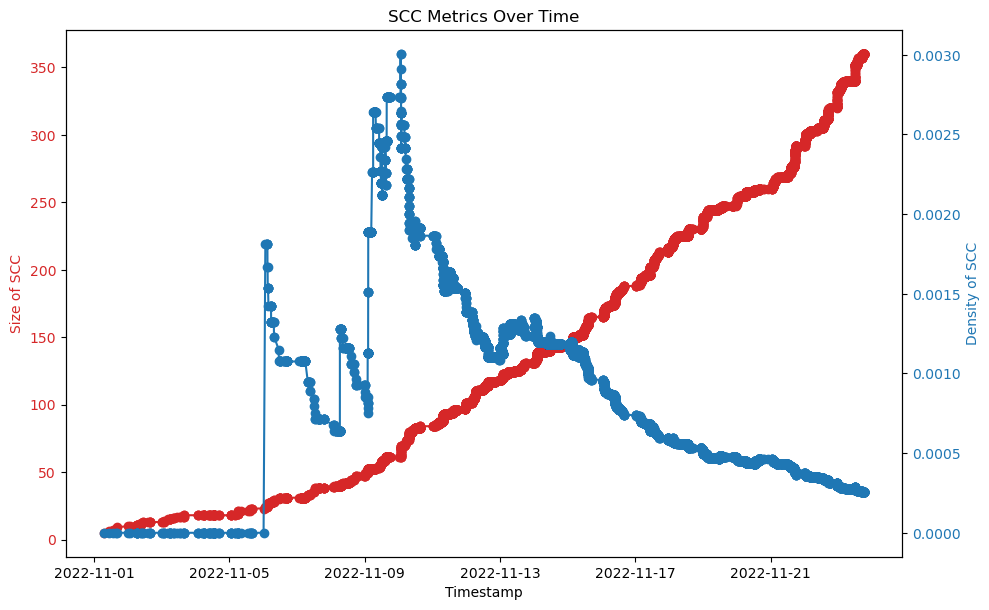

In [215]:
plot_scc_time_series(all_scc[1])

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_1960/4276516248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


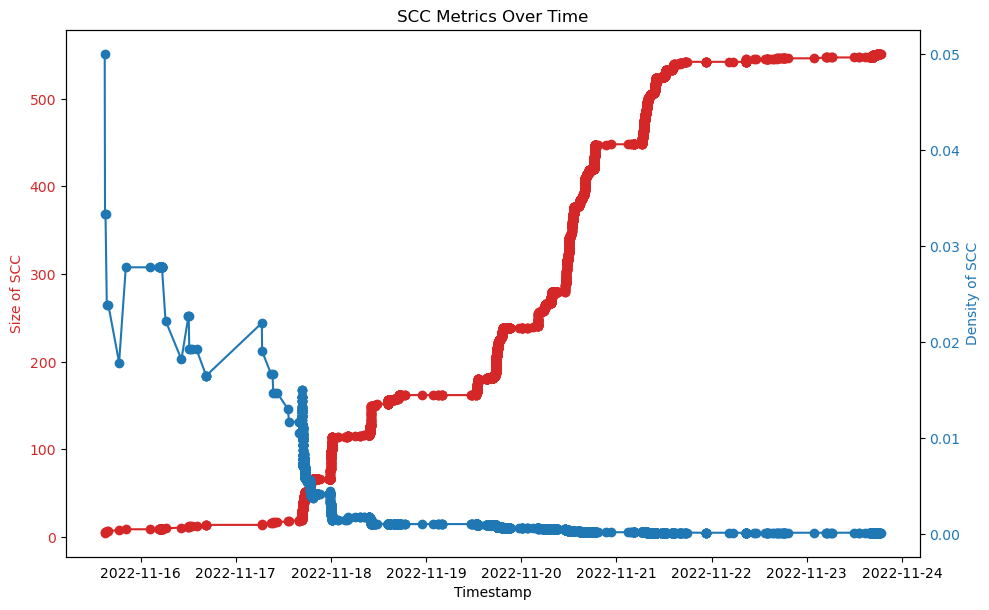

In [216]:
plot_scc_time_series(all_scc[2])

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_1960/4276516248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


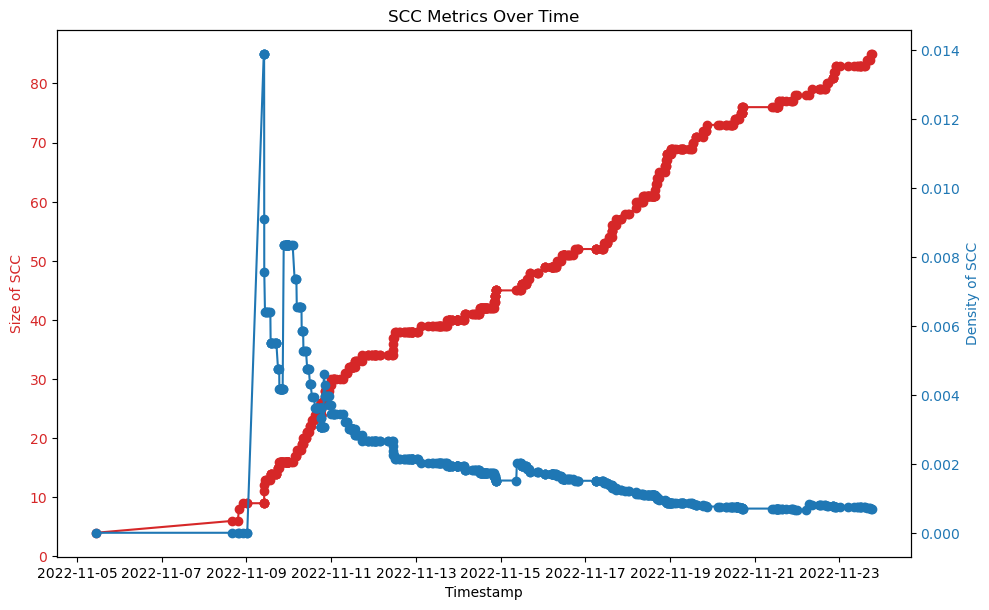

In [217]:
plot_scc_time_series(all_scc[3])

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_1960/4276516248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


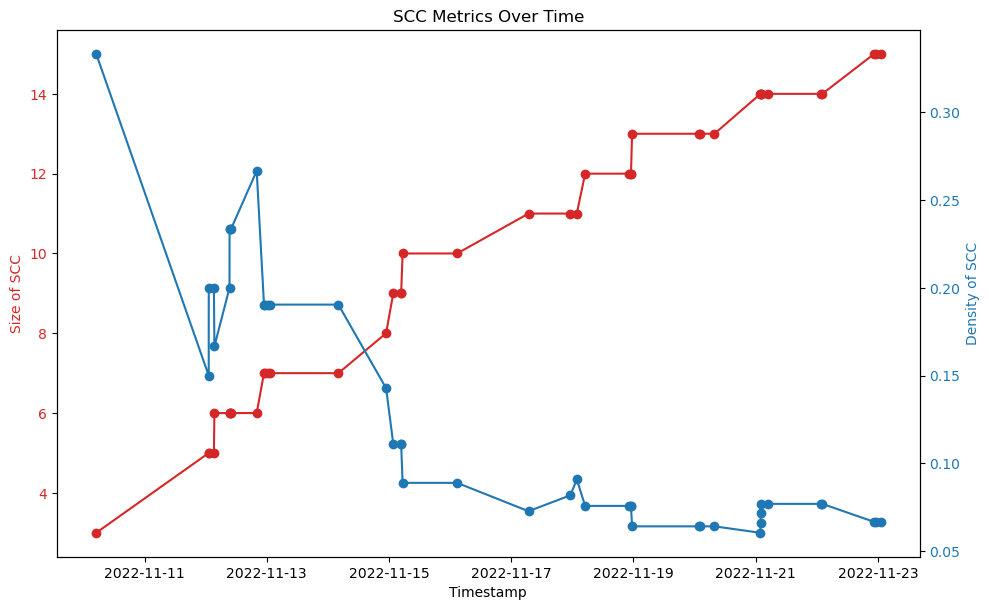

In [218]:
plot_scc_time_series(all_scc[4])

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_1960/4276516248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


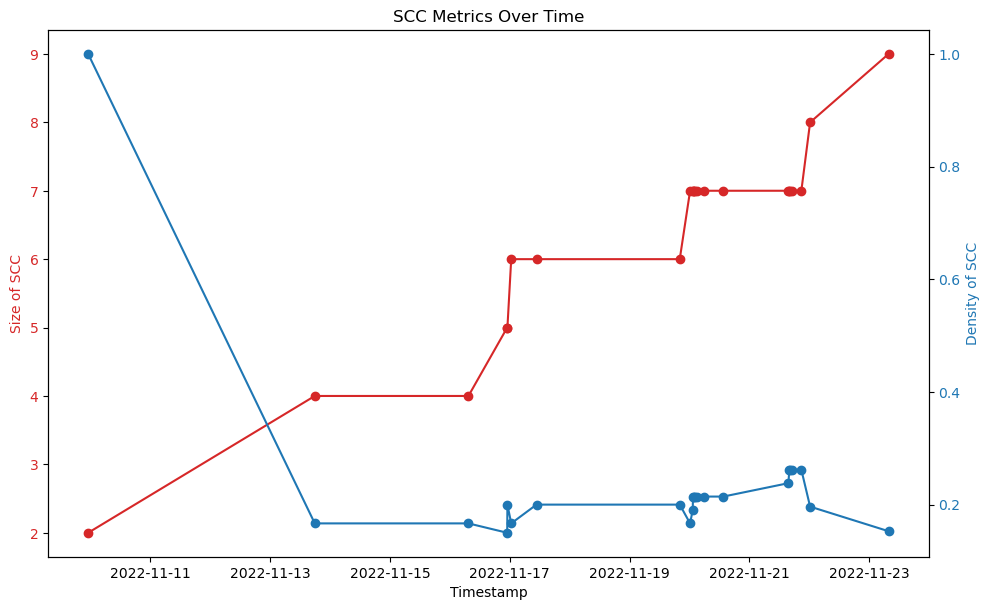

In [219]:
plot_scc_time_series(all_scc[5])

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_1960/4276516248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


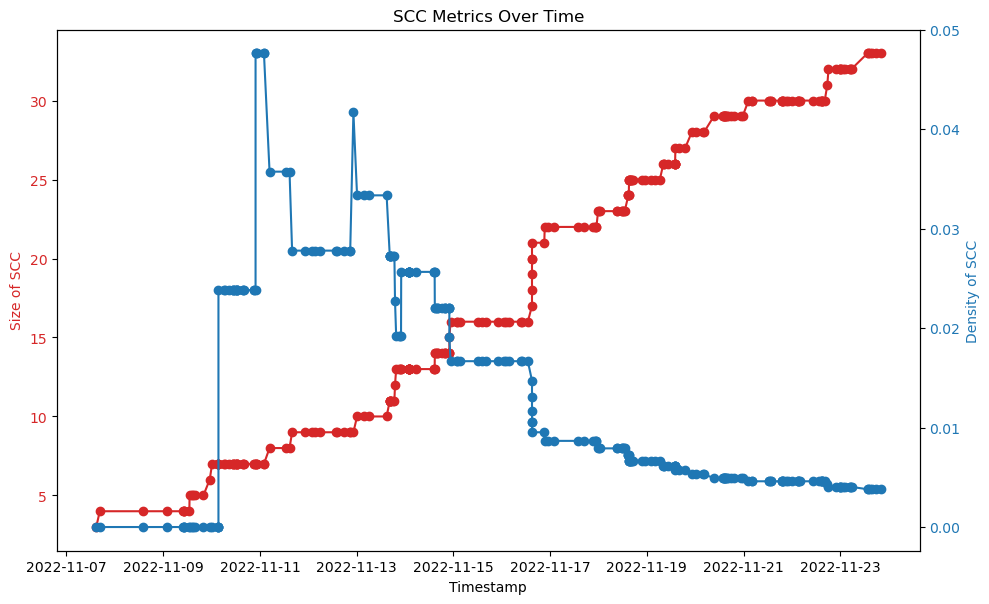

In [220]:
plot_scc_time_series(all_scc[6])

/var/folders/mr/lkxzqtl162nc8t8yqxl8hjyh0000gn/T/ipykernel_1960/4276516248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_scc['created_at'] = pd.to_datetime(df_network_scc['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


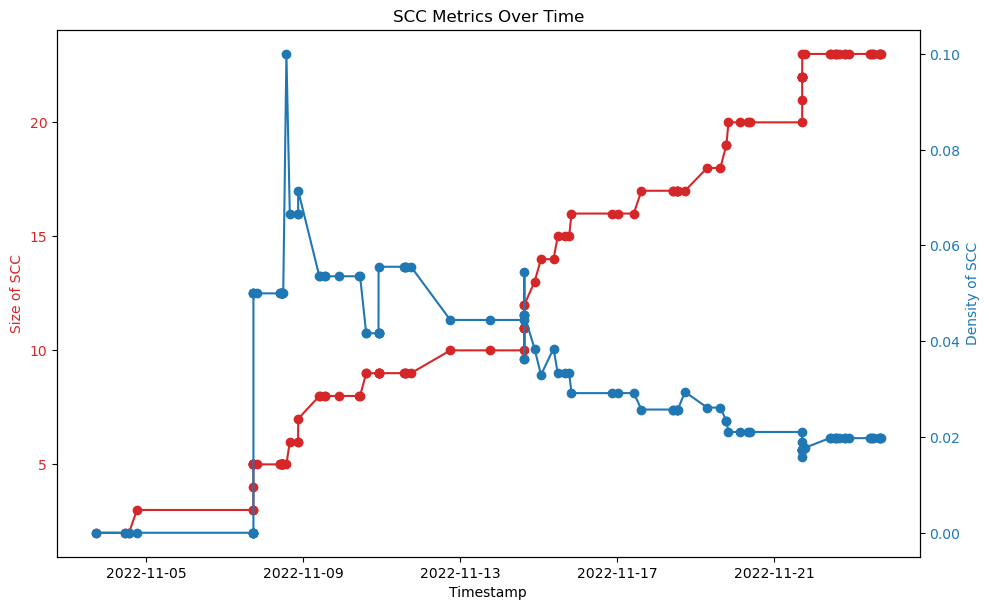

In [231]:
plot_scc_time_series(all_scc[7])